In [1]:
import numpy as np
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit import execute
from qiskit import BasicAer
from qiskit.tools.visualization import plot_histogram
from qiskit import IBMQ
from qiskit.providers.ibmq import least_busy
from qiskit.tools.monitor import job_monitor
import numpy as np
from math import pi


D:\Anaconda3\lib\site-packages\marshmallow\schema.py:364: ChangedInMarshmallow3Warning: strict=False is not recommended. In marshmallow 3.0, schemas will always be strict. See https://marshmallow.readthedocs.io/en/latest/upgrading.html#schemas-are-always-strict
  ChangedInMarshmallow3Warning


In [2]:
M = 2
N = 4
beta = np.arcsin(np.sqrt(M/N))
jop = (pi/2-beta) / (2*beta)
J = np.floor(jop)#向下取整
print(J)
phi = 2*np.arcsin(np.sin(pi/(4*J+6)) / np.sin(beta))
print(phi)


0.0
1.5707963267948961


{'11': 984, '10': 995, '00': 69}


D:\Anaconda3\lib\site-packages\marshmallow\schema.py:364: ChangedInMarshmallow3Warning: strict=False is not recommended. In marshmallow 3.0, schemas will always be strict. See https://marshmallow.readthedocs.io/en/latest/upgrading.html#schemas-are-always-strict
  ChangedInMarshmallow3Warning


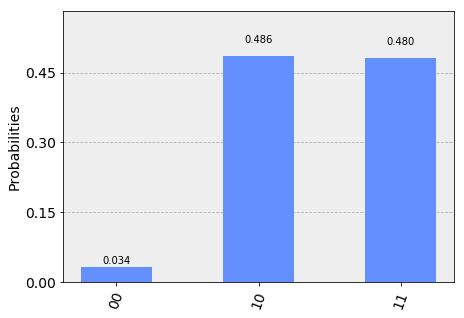

In [3]:
# Create a Quantum Register with 3 qubits.
n = 2
qr = QuantumRegister(n)#Oracle工作空间为qr[0]
cr = ClassicalRegister(n)
qc = QuantumCircuit(qr,cr)

qc.ry(1.9106,qr[1])
qc.ch(qr[1],qr[0])#这里验证ch没有问题

for i in range(int(J)+1):
    #oracle 标记10,11
    qc.u1(phi,qr[1])
    
    #Hn
    qc.ch(qr[1],qr[0])
    qc.ry(-1.9106,qr[1])

    #条件相移
    qc.x(qr[1])
    qc.u1(phi,qr[1])
    qc.cu1(-phi,qr[1],qr[0])
    qc.x(qr[1])
        
    #Hn
    qc.ry(1.9106,qr[1])
    qc.ch(qr[1],qr[0])

#测量
for i in range(n):
    qc.measure(qr[i],cr[i])

backend_sim = BasicAer.get_backend('qasm_simulator')

# Execute the circuit on the qasm simulator.
# We've set the number of repeats of the circuit
# to be 1024, which is the default.
job_sim = execute(qc, backend_sim, shots=2048)

# Grab the results from the job.
result_sim = job_sim.result()
counts = result_sim.get_counts(qc)


print(counts)
plot_histogram(counts)


{'11': 684, '10': 703, '00': 661}


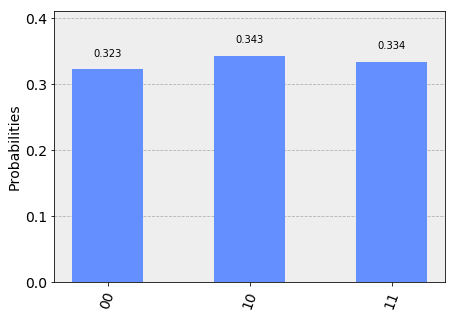

In [3]:
n = 2
qr = QuantumRegister(n)#Oracle工作空间为qr[0]
cr = ClassicalRegister(n)
qc = QuantumCircuit(qr,cr)

qc.ry(1.9106,qr[1])
qc.ch(qr[1],qr[0])#这里验证ch没有问题
for i in range(n):
    qc.measure(qr[i],cr[i])

backend_sim = BasicAer.get_backend('qasm_simulator')

# Execute the circuit on the qasm simulator.
# We've set the number of repeats of the circuit
# to be 1024, which is the default.
job_sim = execute(qc, backend_sim, shots=2048)

# Grab the results from the job.
result_sim = job_sim.result()
counts = result_sim.get_counts(qc)


print(counts)
plot_histogram(counts)

{'101': 711, '111': 768, '001': 19001}


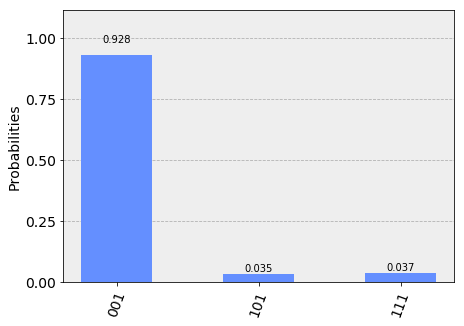

In [10]:
n = 3
qr = QuantumRegister(n)#Oracle工作空间为qr[0]
cr = ClassicalRegister(n)
qc = QuantumCircuit(qr,cr)

qc.x(qr[0])
qc.ry(1.9106,qr[2])
qc.ch(qr[2],qr[1])#这里验证ch没有问题
#qc.h(qr[2])
#qc.h(qr[1])
qc.h(qr[0])

qc.cx(qr[2],qr[0])
qc.ch(qr[2],qr[1])
qc.ry(-1.9106,qr[2])

#qc.h(qr[2])
#qc.h(qr[1])

qc.x(qr[2])
qc.x(qr[1])
qc.h(qr[1])
qc.cx(qr[2],qr[1])
qc.h(qr[1])
qc.x(qr[1])
qc.x(qr[2])

#qc.cz(qr[2],qr[1])

qc.ry(1.9106,qr[2])
qc.ch(qr[2],qr[1])
#qc.h(qr[2])
#qc.h(qr[1])
qc.h(qr[0])

for i in range(n):
    qc.measure(qr[i],cr[i])

backend_sim = BasicAer.get_backend('qasm_simulator')

# Execute the circuit on the qasm simulator.
# We've set the number of repeats of the circuit
# to be 1024, which is the default.
job_sim = execute(qc, backend_sim, shots=20480)

# Grab the results from the job.
result_sim = job_sim.result()
counts = result_sim.get_counts(qc)


print(counts) 
plot_histogram(counts)

In [4]:

IBMQ.load_accounts()
print("Available backends:",IBMQ.backends())

#large_enough_devices = IBMQ.backends(filters=lambda x: x.configuration().n_qubits < 16 and
                                                       #not x.configuration().simulator)
backend = IBMQ.get_backend('ibmqx2') 
print(backend)

shots = 8192           # Number of shots to run the program (experiment); maximum is 8192 shots.
max_credits = 5        # Maximum number of credits to spend on executions. 
job_exp = execute(qc, backend=backend, shots=shots, max_credits=max_credits)
job_monitor(job_exp)
result_exp = job_exp.result()
counts_exp = result_exp.get_counts(qc)
plot_histogram([counts_exp,counts])


ConnectionError: Couldn't connect to IBMQ server: error during login: License required. You need to accept the License from Web Platform. https://quantumexperience.ng.bluemix.net

In [5]:
print(backend)
print(large_enough_devices)
print(least_busy(large_enough_devices))

NameError: name 'backend' is not defined

In [ ]:
IBMQ.load_accounts()
print("Available backends:",IBMQ.backends())

large_enough_devices = IBMQ.backends(filters=lambda x: x.configuration().n_qubits > 4 and
                                                       not x.configuration().simulator)
backend = least_busy(large_enough_devices)


shots = 8192           # Number of shots to run the program (experiment); maximum is 8192 shots.
max_credits = 5        # Maximum number of credits to spend on executions. 
job_exp = execute(qc, backend=backend, shots=shots, max_credits=max_credits)
job_monitor(job_exp)
result_exp = job_exp.result()
counts_exp = result_exp.get_counts(qc)
plot_histogram([counts_exp,counts])

In [12]:
print(counts_exp)

{'001': 2256, '101': 441, '011': 239, '111': 264, '010': 388, '100': 707, '110': 390, '000': 3507}


{'000': 1024}


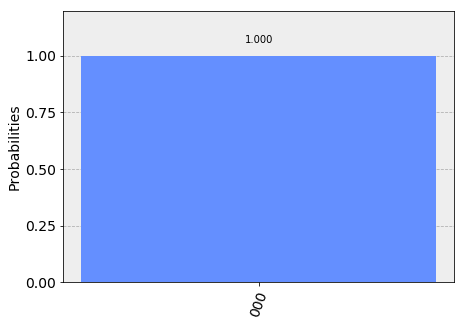

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline

# importing Qiskit
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, execute
from qiskit import Aer, IBMQ

#测试CU3门是否已经回复正常
n=3#比特数
phi = pi

qr = QuantumRegister(n)#Oracle工作空间为qr[0]
cr = ClassicalRegister(n)
qrc = QuantumCircuit(qr,cr)

qrc.cu3(0,phi/2,0,qr[1],qr[0])
#qrc.cx(qr[2],qr[1])
qrc.x(qr[1])
qrc.cu3(0,-phi/2,0,qr[1],qr[0])
qrc.x(qr[1])
#qrc.cx(qr[2],qr[1])
qrc.cu3(0,phi/2,0,qr[1],qr[0])
'''
simulator = Aer.get_backend('unitary_simulator')
# Execute and get counts
result = execute(qrc, simulator).result()
unitary = result.get_unitary(qrc)
a = np.round(unitary,3)
print("Circuit unitary:\n", a)
'''
#测量
for i in range(n):
    qrc.measure(qr[i],cr[i])

backend_sim = BasicAer.get_backend('qasm_simulator')

# Execute the circuit on the qasm simulator.
# We've set the number of repeats of the circuit
# to be 1024, which is the default.
job_sim = execute(qrc, backend_sim, shots=1024)

# Grab the results from the job.
result_sim = job_sim.result()
counts = result_sim.get_counts(qrc)


print(counts)
plot_histogram(counts)


In [6]:
IBMQ.active_accounts()

[]